In [ ]:
import torch
import numpy as np

In [ ]:
x = torch.randn(4, 6, 3, 640, 960)


In [ ]:
x = torch.tensor([[[1, 2],
      [3, 4],
      [5, 6]]])

In [ ]:
x = torch.randn(10, 4)
torch.tensor(np.concatenate([x]*9, axis=0)).shape

torch.Size([90, 4])

In [ ]:
x.shape

torch.Size([1, 3, 2])

In [ ]:
x[:,:, 0]

tensor([[1, 3, 5]])

In [ ]:
import torch
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, in_channels, hidden, classes):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_channels,
                  out_channels=hidden,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden,
                  out_channels=hidden,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)

    )

    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),

      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                    stride=2)

    )



    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=2560,
                  out_features=classes)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    return self.classifier(x)


In [ ]:
model = TinyVGG(3, 3, 3)
print(model.state_dict())
model

OrderedDict([('conv_block_1.0.weight', tensor([[[[-0.0728,  0.1428,  0.0493],
          [-0.0196,  0.1436, -0.0639],
          [ 0.0249, -0.1408, -0.0841]],

         [[-0.0640, -0.0931,  0.0568],
          [-0.1626,  0.0966,  0.0004],
          [ 0.0599, -0.0961,  0.1880]],

         [[ 0.0461, -0.1919, -0.0940],
          [-0.0932, -0.1347, -0.1514],
          [-0.0179,  0.0944,  0.0482]]],


        [[[ 0.1165,  0.0484,  0.0187],
          [ 0.0483,  0.1476,  0.0762],
          [ 0.1816, -0.0360, -0.1649]],

         [[ 0.1524, -0.1497, -0.0372],
          [-0.0938,  0.0895, -0.0594],
          [ 0.1251,  0.0291,  0.1733]],

         [[-0.0851,  0.0286, -0.0311],
          [-0.0236,  0.0828, -0.0895],
          [-0.0430, -0.1192,  0.1364]]],


        [[[-0.0511,  0.1746,  0.0977],
          [ 0.1244, -0.0456, -0.0113],
          [-0.0824, -0.1668,  0.1611]],

         [[-0.0925, -0.0626,  0.0056],
          [-0.1316,  0.0763, -0.0442],
          [-0.1459,  0.1374,  0.1507]],

     

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
import torch
print(torch.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

2.3.1+cu121


In [ ]:
from torch import nn
from torch.utils.data import DataLoader

In [ ]:
import requests
from pathlib import Path
from zipfile import ZipFile

data_path = Path('data')

(data_path / 'pizza_sushi_steak').mkdir(parents=True, exist_ok=True)

response = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')

with open(data_path / 'pizza_sushi_steak.zip', 'wb') as f:
  f.write(response.content)

with ZipFile(data_path / 'pizza_sushi_steak.zip', 'r') as zipFile:
  zipFile.extractall(data_path / 'pizza_sushi_steak')

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2024-05-19 08:47:34--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2024-05-19 08:47:34--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz      80%[===============>    ]   3.73G  25.9MB/s    eta 39s    ^C


In [ ]:
from torchvision import datasets

traindata = datasets.Food101(root='data',
                             split='train',
                             download=True,
                            )

testdata = datasets.Food101(root='data',
                            split='test',
                            download=True)

In [ ]:
classes = traindata.classes
print(classes[traindata[0][1]])
traindata[0][0]

In [ ]:
import random
from pathlib import Path
data_dir = Path('data')
data_path = data_dir / 'food-101' / 'images'
target_classes = ['pizza', 'steak', 'sushi']
amount_to_get = 0.2

def get_subset(image_path = data_path,
               data_splits=['train', 'test'],
               target_classes = ['pizza', 'steak', 'sushi'],
               amount=0.1,
               seed=42):
  random.seed(42)
  label_splits = {}

  for data_split in data_splits:
    print(f'[INFO] Creating image split for {data_split}')
    label_path = data_dir / 'food-101' / 'meta' / f'{data_split}.txt'
    with open(label_path, 'r') as f:
      labels = [line.strip('\n') for line in f.readlines() if line.split('/')[0] in target_classes]

    number_to_sample = round(amount_to_get * len(labels))
    print(f'[INFO] Getting random subset of {number_to_sample} images for {data_split}')
    sampled_images = random.sample(labels, k=number_to_sample)

    image_paths = [Path(str(image_path / sampled_image) + '.jpg') for sampled_image in sampled_images]
    label_splits[data_split] = image_paths
  return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits['train'][:10]


In [ ]:
target_dir_name = f'data_{amount_to_get * 100}_percent'
target_dir = Path(target_dir_name)
target_dir.mkdir(parents=True, exist_ok=True)

import shutil

for image_split in label_splits.keys():
  for image_path in label_splits[image_split]:
    print('image path name:', image_path.name)
    dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
    print('dest dir parent:', dest_dir.parent)
    if not dest_dir.parent.is_dir():
      dest_dir.parent.mkdir(parents=True, exist_ok=True)
    print(f'[INFO] Moving {image_path} to {dest_dir}...')
    shutil.copy2(image_path, dest_dir)

In [ ]:
def walk_through_dir(dir_path):
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} dir and {len(filenames)} images in {dirpath}')

walk_through_dir(target_dir)

In [ ]:
zip_file_name = data_dir / f'pizza_steak_sushi_{str(int(amount_to_get * 100))}_percent'
shutil.make_archive(zip_file_name,
                    format='zip',
                    root_dir=target_dir)

In [ ]:
!ls data

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path} directory exists')
else:
  image_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  f.write(request.content)

with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('Unzipping pizza, steak, sushi data...')
  zip_ref.extractall(image_path)

Unzipping pizza, steak, sushi data...


In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

dir_path = Path('data') / 'pizza_steak_sushi'
walk_through_dir(dir_path)


There are 2 directories and 0 images in data/pizza_steak_sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/train.
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak.
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza.
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/test.
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak.
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza.
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi.


In [ ]:
# Setup train and testing paths

train_dir = dir_path / 'train'
test_dir = dir_path / 'test'

data/pizza_steak_sushi/train/pizza/2228322.jpg
pizza
Random image path: data/pizza_steak_sushi/train/pizza/2228322.jpg
Image class: pizza
Image height: 512
Image weight: 512


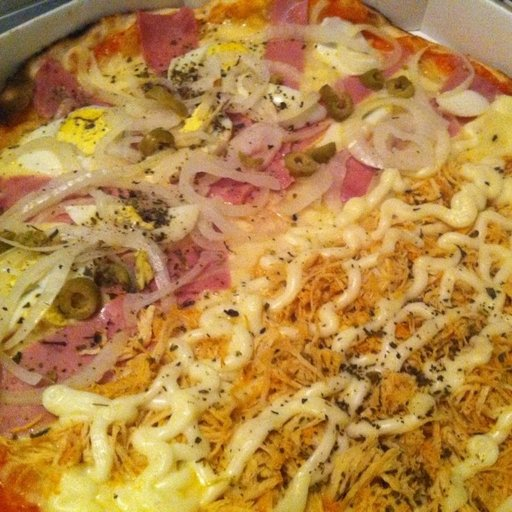

In [ ]:
# Visualize images
import random
from PIL import Image
#random.seed(42)

image_path_list = list(dir_path.glob('*/*/*.jpg'))

# Pick a random image
random_image_path = random.choice(image_path_list)
print(random_image_path)

# Get image class
image_label = random_image_path.parent.stem
print(image_label)

# Open image
image = Image.open(random_image_path)

# Image metadata
print(f'Random image path:', random_image_path)
print(f'Image class:', image_label)
print(f'Image height:', image.height)
print(f'Image weight:', image.width)

image

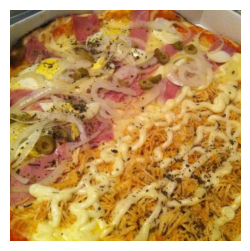

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.axis('off');

In [ ]:
import numpy as np

# Turn the image into array
image_as_array = np.asarray(image)

# Plot the image with matplotlib
image_as_array.shape

(512, 512, 3)

In [ ]:
# 3. Transforming data

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into torch.tensor
    transforms.ToTensor() # H, W, C -> C, H, W and [0, 1.0]
])

In [ ]:
image_transformed = data_transform(image)

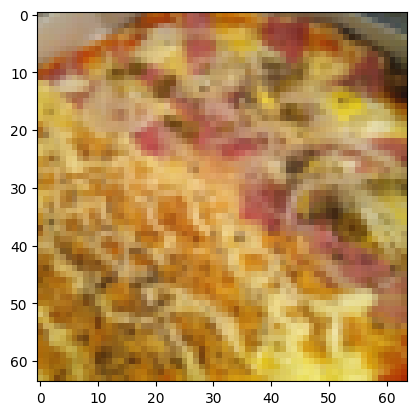

In [ ]:
plt.imshow(image_transformed.permute(1, 2, 0))

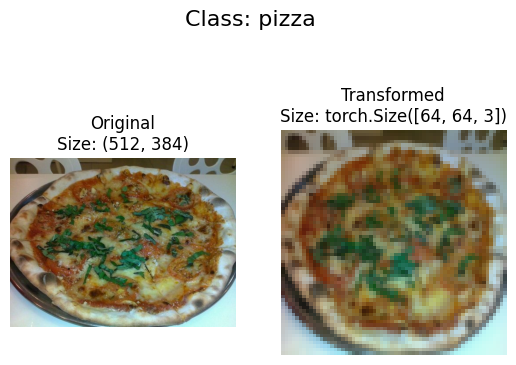

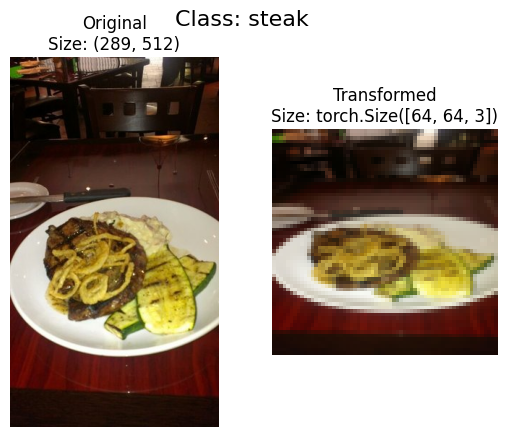

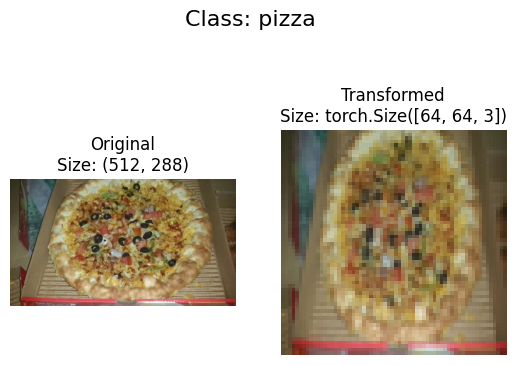

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  if seed:
    random.seed(seed)

  image_paths_random = random.sample(image_paths, k=n)

  for image_path in image_paths_random:
    with Image.open(image_path) as f:
     fig, ax = plt.subplots(nrows=1, ncols=2)
     ax[0].imshow(f)
     ax[0].set_title(f'Original\nSize: {f.size}')
     ax[0].axis(False)

     # Transform
     transformed_image = transform(f).permute(1, 2, 0)
     ax[1].imshow(transformed_image)
     ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
     ax[1].axis('off')

     fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)

plot_transformed_images(image_path_list, data_transform, 3)

In [ ]:
# 4. Option 1: ImageFolder
from PIL import Image
from torchvision.datasets import ImageFolder

data_imagefolder = {}
for split in ['train', 'test']:
  data_imagefolder[split] = ImageFolder(root=Path('data') / 'pizza_steak_sushi' / split,
                                        transform=data_transform,
                                        loader=Image.open)

In [ ]:
train_data, test_data = data_imagefolder['train'], data_imagefolder['test']

In [ ]:
random.sample(train_data.samples, 3)

[('data/pizza_steak_sushi/train/steak/2287136.jpg', 1),
 ('data/pizza_steak_sushi/train/steak/1615395.jpg', 1),
 ('data/pizza_steak_sushi/train/pizza/2228322.jpg', 0)]

In [ ]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [ ]:
from torch.utils.data import DataLoader
import os

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers=os.cpu_count()
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=True,
                             num_workers=os.cpu_count())

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cc484f27460>,
 <torch.utils.data.dataloader.DataLoader at 0x7cc484f25300>)

In [ ]:
images, labels = next(iter(train_dataloader))
images.shape, labels.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### 2.1 Create Datasets and DataLoaders (script mode)

Let's use the Jupiter magic function to create a `.py` file for creating DataLoaders.

We can save a code cell's contents to a file using the Jupyter magic `%%writefile filename`

In [ ]:
# Create a directory for going_modular scripts

import os
os.mkdir('going_modular')

In [ ]:
%%writefile going_modular/data_setup.py
"""
Contains functionality for creating PyTorch DataLoader's for
image classfications data.
"""

import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int = NUM_WORKERS
  ):
  """Creates training and testing DataLoaders.

  Takes in a training directory, test directory path and
  turn them into PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoader.
    num_worker: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names = create_dataloader(
        train_dir=path/to/train_dir,
        test_dir = path/to/test_dir,
        transform=some_transform,
        batch_size=32,
        num_workers=4
      )
  """
  train_dataset = datasets.ImageFolder(root=train_dir, transform=transform, loader=Image.open)
  test_dataset = datasets.ImageFolder(root=test_dir, transform=transform, loader=Image.open)

  train_dataloader = DataLoader(train_dataset,
                                batch_size=batch_size,
                                num_workers=num_workers,
                                shuffle=True,
                                pin_memory=True)

  test_dataloader = DataLoader(test_dataset,
                               batch_size,
                               num_workers = num_workers,
                               pin_memory=True)

  return train_dataloader, test_dataloader, train_dataset.classes

Writing going_modular/data_setup.py


In [ ]:
from going_modular import data_setup
data_setup.create_dataloader()

In [ ]:
# Option 2: Replicating ImageFolder by a custom Dataset
'''
1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as a dictionary from the Dataset

Pros:
- Can create a Dataset out of almost anything
- Not limited to PyTorch pre-built Dataset functions

Cons:
- Not always work with Dataset
- Prone to errors and more codes

All custom datasets in PyTorch often subclasses torch.utils.data.Dataset
'''

In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

We want a function to:
1. Get the class name using os.scandir() to traverse a target directory  (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them.

In [ ]:
target_directory = Path('data') / 'pizza_steak_sushi' / 'train'
print(f'Target dir: {target_directory}')

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
from typing import Tuple, Dict, List

def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ Finds the class folder names in a target directory. """
  # 1. Get the class names by scanning the target directory
  classes = sorted([entry.name for entry in os.scandir(directory) if entry.is_dir()])

  # 2. Raise error
  if not classes:
    raise FileNotFoundError(f"Couldn't")

  # 3. Create a directory of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx


In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

To create our own custom dataset, we want to:
1. Subsclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory as well as a transform if we'd like to transform our data.
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels.
4. Create a function to `load_images()`, this function will open an image.
5. Override the `__len__()` method to return the length of our dataset.
6. Overrite the `__getitem__()` method to return a given sample when passed an index.

In [ ]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
import pathlib
import numpy as np

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):

    # 3. Create class attributes
    # Get all the image paths
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    # Set up transform
    self.transform = transform
    # Create classes and class_to_idx
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it"
    image_path = self.paths[index]
    return Image.open(image_path)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns the total number of samples"
    image = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(image), class_idx

    else:
      return image, class_idx

  def __len__(self) -> int:
    return len(self.paths)


In [ ]:
# Create a transform

train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
# Test out ImageFolderCustom

train_data_custom = ImageFolderCustom(train_dir,
                                      transform=train_transform)

test_data_custom = ImageFolderCustom(test_dir,
                                     transform=test_transform)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

Function to display random images
1. Take in a `Dataset` and a number of other parameters such as class names and how many image to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random samples indexes from the target datasets.
5. Setup a matplotlib plot
6. Loop through the random sample images and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib (HWC)

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  n = min(10, n)

  if seed is not None:
    random.seed(seed)

  image_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(5, 20))

  for i, targ_sample in enumerate(image_idx):
    image, label = dataset[targ_sample]
    image = image.permute(1, 2, 0)
    plt.subplot(1, n, i + 1)
    plt.imshow(image)
    plt.title(classes[label])
    plt.axis('off')

In [ ]:
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=32,
                                     shuffle=True)

test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size=32,
                                    shuffle=True)

In [ ]:
images, labels = next(iter(train_dataloader_custom))
images.shape, labels.shape

ValueError: too many values to unpack (expected 2)

In [ ]:
images, labels = next(iter(train_dataloader_custom))
images.shape, labels.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2385731.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1245193.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/887831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/343036.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3806282.jpg')]

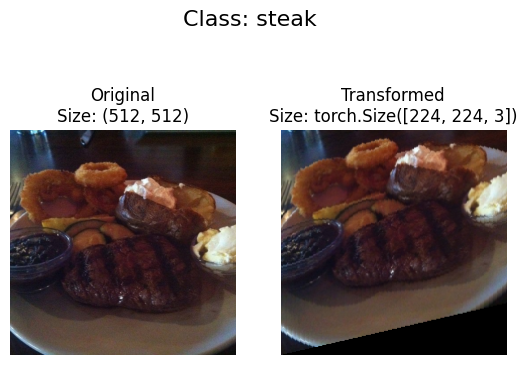

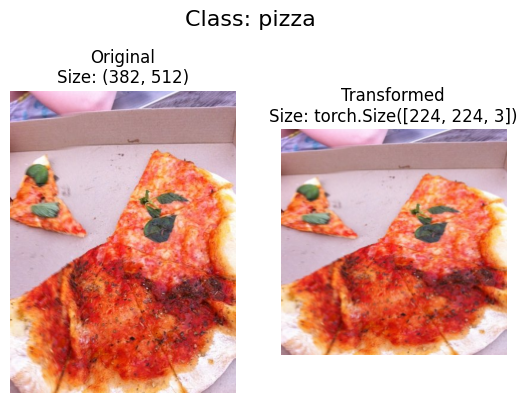

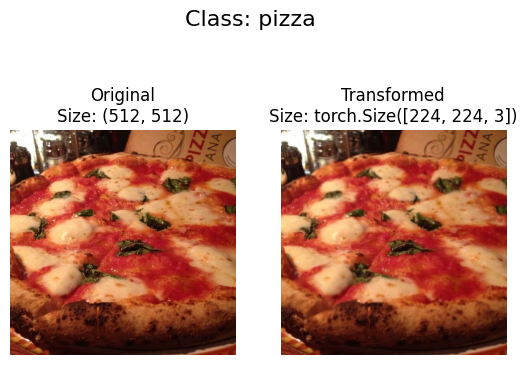

In [ ]:
plot_transformed_images(image_paths = image_path_list,
                        transform=train_transform,
                        n=3,
                        seed=None)

In [ ]:
# 7. Model 0: TinyVGG without data augmentation
# Create a simple transform
from torch import nn
from torchvision.datasets import ImageFolder
import os

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

data_path = Path('data') / 'pizza_steak_sushi'
train_path = data_path / 'train'
test_path = data_path / 'test'

train_dataset = ImageFolder(root=train_path,
                            transform=simple_transform,
                            target_transform=None)

test_dataset = ImageFolder(root=test_path,
                           transform=simple_transform)

train_dataloader = DataLoader(train_dataset, 32, shuffle=True, num_workers=os.cpu_count())
test_dataloader = DataLoader(test_dataset, 32, shuffle=True, num_workers=os.cpu_count())

class TinyVGG(nn.Module):
  def __init__(self, in_channels, hidden, classes):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_channels,
                  out_channels=hidden,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden,
                  out_channels=hidden,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)

    )

    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),

      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                    stride=2)

    )



    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=2560,
                  out_features=classes)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    return self.classifier(x)


In [ ]:
import os
os.mkdir('going_modular')

In [ ]:
%%writefile going_modular/model_builder.py

"""
Contains PyTorch model code to instantiate TinyVGG model
"""

from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, in_channels, hidden, classes):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_channels,
                  out_channels=hidden,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden,
                  out_channels=hidden,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)

    )

    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),

      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                    stride=2)

    )



    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=2560,
                  out_features=classes)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    return self.classifier(x)


Writing going_modular/model_builder.py


In [ ]:
from going_modular import model_builder

In [ ]:
import torch
from torch import nn
from going_modular import model_builder

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
model_1 = model_builder.TinyVGG(3, 10, len(classes))

In [ ]:
img_batch, label_batch = next(iter(train_dataloader))
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]

model_1.eval()
with torch.inference_mode():
  pred = model_1(img_single)
  print(pred.shape)
  pred_label = torch.softmax(pred, dim=1).argmax(dim=1)
  print(pred_label)

torch.Size([1, 3])
tensor([0])


In [ ]:
t = torch.tensor([[1, 5, 10],
                  [20, 12, 4]]).type(torch.float)
print(t)
t = torch.softmax(t, dim=1)
print(t)
t.argmax(dim=0)

tensor([[ 1.,  5., 10.],
        [20., 12.,  4.]])
tensor([[1.2257e-04, 6.6920e-03, 9.9319e-01],
        [9.9966e-01, 3.3535e-04, 1.1250e-07]])


tensor([1, 0, 0])

In [ ]:
import matplotlib.pyplot as plt

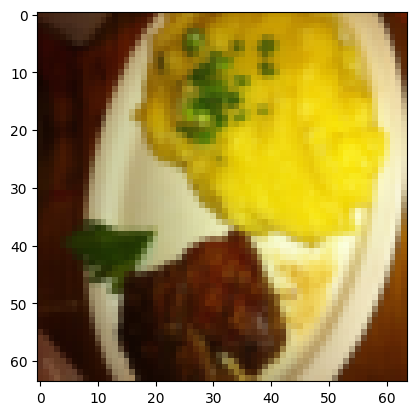

In [ ]:
plt.imshow(img_single.squeeze().permute(2, 1, 0))

In [ ]:
img_batch[0].unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
classes = train_data.classes
classes

['pizza', 'steak', 'sushi']

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(3, 10, len(classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader))
print(image_batch.shape)
model_0(image_batch)

torch.Size([32, 3, 64, 64])


tensor([[0.0578, 0.0634, 0.0351],
        [0.0657, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0689, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

In [ ]:

try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

summary(model_0, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [ ]:
import os
os.mkdir('going_modular')

In [ ]:
%%writefile going_modular/engine.py
from tqdm.auto import tqdm

def train_loop(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn,
               device: torch.device):

  model.train()
  losstotal, acctotal = 0, 0
  for idx, (X, y) in tqdm(enumerate(dataloader)):
    X, y = X.to(device), y.to(device)
    pred_logits = model(X)
    loss = loss_fn(pred_logits, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losstotal += loss.item()
    acctotal += acc_fn(pred_logits, y)

    if idx % 2 == 0:
      print(f'Pass {idx * 32} samples per {len(dataloader) * 32}')

  return losstotal / len(dataloader), acctotal / len(dataloader)


def test_loop(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn,
              acc_fn,
              device):

  losstotal, acctotal = 0, 0
  model.eval()
  with torch.inference_mode():
    for idx, (X, y) in tqdm(enumerate(dataloader)):
      X, y = X.to(device), y.to(device)
      pred_logits = model(X)
      loss = loss_fn(pred_logits, y)
      losstotal += loss
      acctotal += acc_fn(pred_logits, y)

  return losstotal / len(dataloader), acctotal / len(dataloader)

Writing going_modular/engine.py


In [ ]:
%%writefile going_modular/utils.py

import torch
from pathlib import Path

def save_model(model, target_dir, model_name):
  target_dir = Path(target_dir)
  target_dir.mkdir(parents=True, exist_ok=True)
  assert model_name.endswith('.pth') or model_name.endswith('.pt'), 'model_name should end with \'.pth\' or \'.pt\''
  torch.save(model.state_dict(), target_dir / model_name)

Overwriting going_modular/utils.py


In [ ]:
%%writefile going_modular/train.py

from going_modular.model_builder import TinyVGG
import torch
import argparse

torch.manual_seed(42)
model_0 = TinyVGG(3, 10, len(classes))

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)

def acc_fn(pred_logit, target):
  classes = torch.argmax(torch.softmax(pred_logit, dim=1), dim=1)
  return torch.eq(classes, target).sum() / len(target)

In [ ]:
epochs = 5
device = 'cuda' if torch.cuda.is_available() else 'cpu'

results = {'train_loss': [],
           'train_acc': [],
           'test_loss': [],
           'test_acc': []}

for epoch in tqdm(range(epochs)):
  train_loss, train_acc = train_loop(model_0, train_dataloader, loss_fn,
                                     optimizer, acc_fn, device)

  test_loss, test_acc = test_loop(model_0, test_dataloader, loss_fn, acc_fn, device)

  results['train_loss'].append(train_loss)
  results['test_loss'].append(test_loss)
  results['train_acc'].append(train_acc)
  results['test_acc'].append(test_acc)

  print(f'Epoch {epoch}: Train loss: {train_loss:.3f} | Train acc: {train_acc * 100:.3f}\
                         Test loss: {test_loss:.3f} | Test acc: {test_acc * 100:.3f}')

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Epoch 0: Train loss: 1.218 | Train acc: 25.000                         Test loss: 1.150 | Test acc: 27.746


0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Epoch 1: Train loss: 1.104 | Train acc: 29.297                         Test loss: 1.101 | Test acc: 27.746


0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Epoch 2: Train loss: 1.097 | Train acc: 41.406                         Test loss: 1.099 | Test acc: 25.758


0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Epoch 3: Train loss: 1.104 | Train acc: 29.297                         Test loss: 1.100 | Test acc: 27.746


0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Epoch 4: Train loss: 1.096 | Train acc: 41.406                         Test loss: 1.102 | Test acc: 25.758


In [ ]:
%%writefile going_modular/train.py

import torch
import os
from torchvision import transforms
import data_setup, engine, model_builder, utils
import argparse

device = 'gpu' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(42)
torch.cuda.manual_seed(42)

parser = argparse.ArgumentParser(prog='ProgramName',
                                 description='What the program does',
                                 epilog='Text at the bottom of help')

parser.add_argument('filename')
parser.add_argument('-c', '--count')
parser.add_argument('-v', '--verbose', action='store_true')

args = parser.parse_args()

NUM_EPOCHS = 5
BATCH_SIZE = 32
HIDDEN_SIZE = 10
LEARNING_RATE = 0.001

train_dir = 'data/pizza_steak_sushi/train'
test_dir = 'data/pizza_steak_sushi/test'

train_transform = transforms.Compose([
                transforms.Resize(size=(64, 64)),
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.ToTensor()
                ])

test_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                     transforms.ToTensor()
                                     ])

train_dataloader, test_dataloader, classes = data_setup.create_dataloader(train_dir=train_dir,
                                                test_dir=test_dir,
                                                train_transform=train_transform,
                                                test_transform=test_transform,
                                                batch_size=BATCH_SIZE,
                                                )

model_0 = TinyVGG(in_channels=3,
                  hidden=10,
                  classes=3)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train_loop(model=model_0,
                             dataloader=train_dataloader,
                             loss_fn=loss_fn,
                             optimizer=optimizer,
                             acc_fn=acc_fn,
                             device='cpu')

end_time = timer()
print(end_time - start_time)

utils.save_model(model_0, 'models', 'model_0.pth')

Overwriting going_modular/train.py


In [ ]:
!python going_modular/train.py

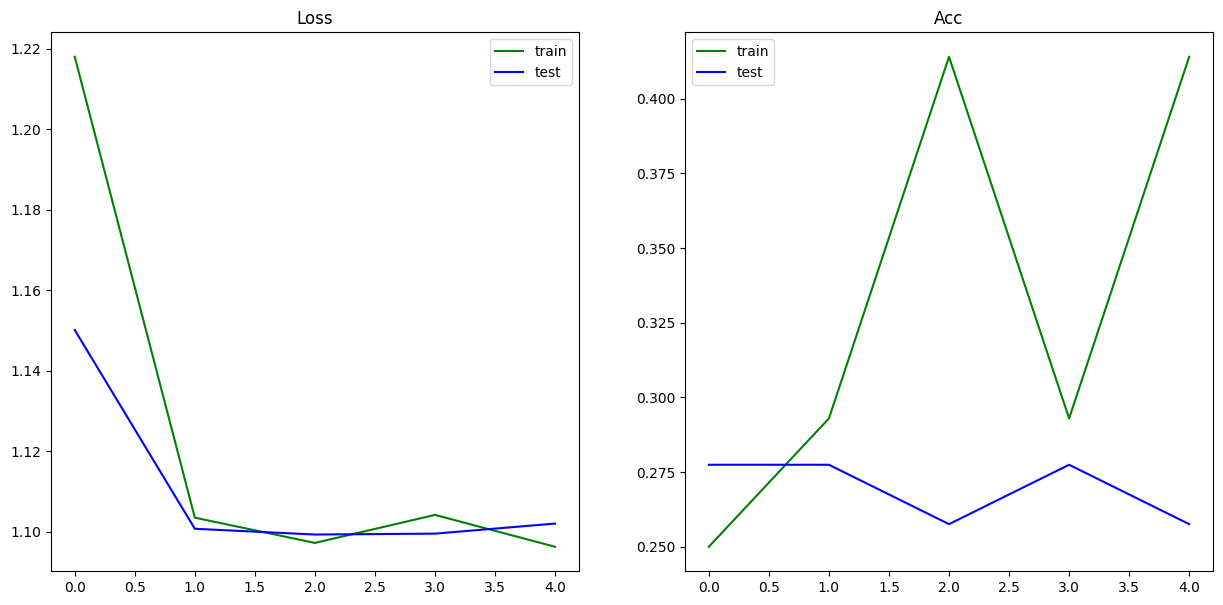

In [ ]:
# Plot loss curve -> Track training over time
import matplotlib.pyplot as plt

def plot_loss_curves(results: Dict[str, List[float]]):
  epochs = range(len(results['train_loss']))
  plt.figure(figsize=(15, 7))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, results['train_loss'], label='train', c='green')
  plt.plot(epochs, results['test_loss'], label='test', c='blue')
  plt.title('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, results['train_acc'], label='train', c='green')
  plt.plot(epochs, results['test_acc'], label='test', c='blue')
  plt.title('Acc')
  plt.legend()
  # plt.xlim(0.0, 10)
  # plt.ylim(0.0, 2)

plot_loss_curves(results)

In [ ]:
# Create training transform with TrivialAugment
from torchvision import transforms

train_transform_trivial = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()
                                    ])

test_transform_simple = transforms.Compose([
                                            transforms.Resize(size=(64, 64)),
                                            transforms.ToTensor()
                                          ])


In [ ]:
from pathlib import Path
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_data = Path('data') / 'pizza_steak_sushi' / 'train'
test_data = Path('data') / 'pizza_steak_sushi' / 'test'
train_data = ImageFolder(root=train_data,
                         transform=train_transform_trivial,
                         target_transform=None)

test_data = ImageFolder(root=test_data,
                        transform=test_transform_simple,
                        target_transform=None)


train_dataloader = DataLoader(train_data, 32, shuffle=True)
test_dataloader = DataLoader(test_data, 32, shuffle=True)

In [ ]:
torch.eq(torch.rand(size=[5]), torch.rand(size=[5])).sum().dim()

0

In [ ]:
model02 = TinyVGG(3, 10, 3)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model02.parameters(), lr=0.1)

def acc_fn(preds, target):
  classes = torch.argmax(torch.softmax(preds, dim=1), dim=1)
  return torch.eq(classes, target).sum().item() / len(target)

In [ ]:
epochs = 5
from tqdm.auto import tqdm
result = {'train_loss': [],
          'test_loss': [],
          'train_acc': [],
          'test_acc': []}

for epoch in tqdm(range(epochs)):
  train_loss, train_acc = train_loop(model02, acc_fn=acc_fn, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, device='cpu')
  result['train_loss'].append(train_loss)
  result['train_acc'].append(train_acc * 100)
  test_loss, test_acc = test_loop(model02, test_dataloader, loss_fn, acc_fn, 'cpu')
  result['test_loss'].append(test_loss)
  result['test_acc'].append(test_acc * 100)

  print(f'Train: {train_loss:.3f}, {train_acc * 100:.3f} | Test: {test_loss:.3f}, {test_acc * 100:.3f}')



  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Train: 844.254, 40.625 | Test: 1.102, 29.735


0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Train: 1.134, 29.297 | Test: 1.141, 23.769


0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Train: 1.104, 29.297 | Test: 1.118, 25.758


0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Train: 1.084, 43.750 | Test: 1.096, 35.985


0it [00:00, ?it/s]

Pass 0 samples per 256
Pass 64 samples per 256
Pass 128 samples per 256
Pass 192 samples per 256


0it [00:00, ?it/s]

Train: 1.079, 42.578 | Test: 1.125, 30.019


Text(0.5, 1.0, 'Acc')

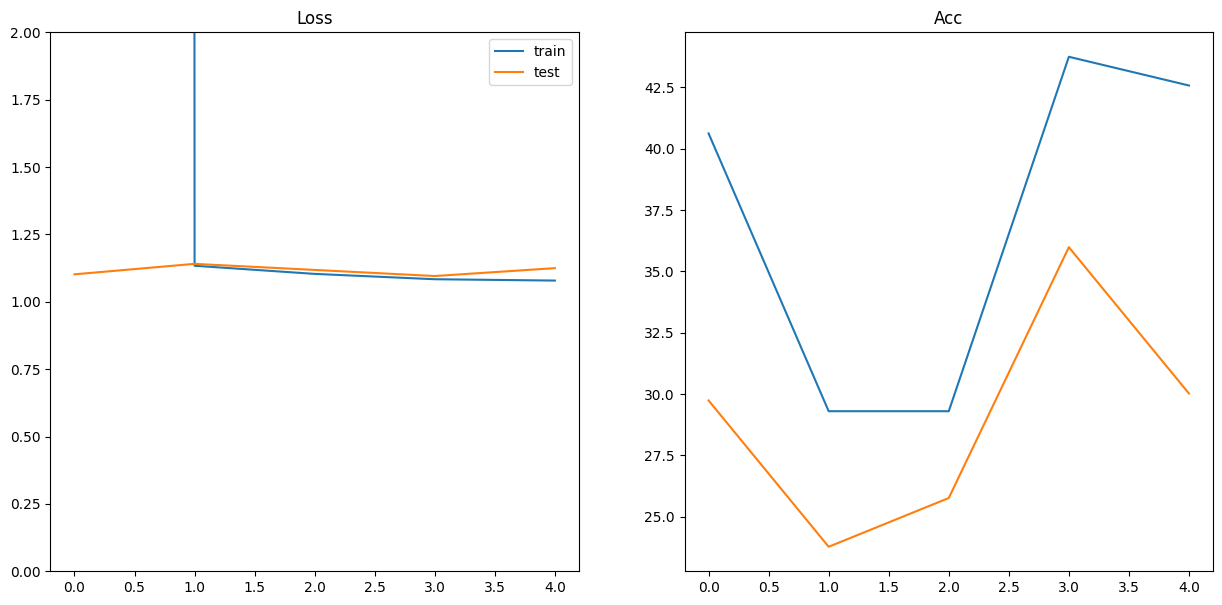

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(result['train_loss']))
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs, result['train_loss'], label='train')
plt.plot(epochs, result['test_loss'], label='test')
plt.title('Loss')
plt.ylim(0, 2)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, result['train_acc'], label='train')
plt.plot(epochs, result['test_acc'], label='test')
plt.title('Acc')


In [ ]:
type(torch.tensor(1))

torch.Tensor

In [ ]:
list(model0_df['train_loss'])

[1.2180000618100166,
 1.103512480854988,
 1.0972391217947006,
 1.104199841618538,
 1.09628264605999]

In [ ]:
import pandas as pd
import numpy as np

result0 = results
result1 = result

model0_df = pd.DataFrame(result0)
for c in model0_df.columns:
  if isinstance(model0_df.iloc[0][c], torch.Tensor):
    model0_df[c] = torch.tensor(model0_df[c]).to(torch.float)

model1_df = pd.DataFrame(result1)
for c in model1_df.columns:
  if isinstance(model1_df.iloc[0][c], torch.Tensor):
    model1_df[c] = torch.tensor(model1_df[c]).to(torch.float)

model0_df.head(5)

,train_loss,train_acc,test_loss,test_acc
0,1.218000,0.250000,1.150131,0.277462
1,1.103512,0.292969,1.100754,0.277462
2,1.097239,0.414062,1.099324,0.257576
3,1.104200,0.292969,1.099548,0.277462
4,1.096283,0.414062,1.102049,0.257576


In [ ]:
!wget https://images.alphacoders.com/101/thumb-1920-1016857.jpg

--2024-05-25 17:21:10--  https://images.alphacoders.com/101/thumb-1920-1016857.jpg
Resolving images.alphacoders.com (images.alphacoders.com)... 172.67.48.187, 104.20.75.132, 104.20.76.132, ...
Connecting to images.alphacoders.com (images.alphacoders.com)|172.67.48.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 423756 (414K) [image/jpeg]
Saving to: ‘thumb-1920-1016857.jpg’

thumb-1920-1016857. 100%[===================>] 413.82K  --.-KB/s    in 0.03s   

2024-05-25 17:21:10 (14.1 MB/s) - ‘thumb-1920-1016857.jpg’ saved [423756/423756]



In [ ]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

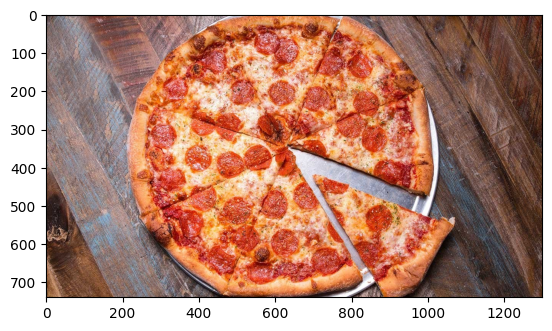

In [ ]:
image = read_image(str(image_path))
plt.imshow(image.permute(1, 2, 0))

In [ ]:
image.dtype, image.shape

(torch.uint8, torch.Size([3, 740, 1300]))

To make a prediction on a custom image, we had to:
* Load the image and turn it into a tensor.
* Make sure the image was the same datatype as the model (torch.float32).
* Make sure the image was the same shape as the data the model was trained on (3, 63, 64) with a batch size (1, 3, 64, 64).
* Make sure the image was on the same device as our model.

In [ ]:
# right datatype
# right shape
# right device
from torchvision.io import read_image

transform_pipeline = transforms.Compose([
    transforms.Resize(size=(64, 64))
])
model_0.eval()
with torch.inference_mode():
  image = read_image('thumb.jpg').to(torch.float32) / 255
  image = transforms.Resize(size=(64, 64))(image)
  #image = train_transform_trivial(image)
  pred = model_0(image.unsqueeze(0))
  print(torch.argmax(torch.softmax(pred, dim=1), dim=1))

tensor([1])


In [ ]:
import requests

image_path = Path('data') / 'pizza.jpg'

response = requests.get('https://www.bowlmor.com/sites/bowlmor/files/styles/xl_responsive/public/Bowlero_KidsParties_LargeCarousel06_0.jpg?itok=HDLtrsEe')

if not image_path.is_file():
  with open(image_path, 'wb') as f:
    f.write(response.content)

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        transform_pipeline,
                        image_path: str,
                        classes: List[str]):

  image = read_image(image_path).type(torch.float32) / 255
  image = transform_pipeline(image).unsqueeze(0)
  model.eval()
  with torch.inference_mode():
    pred = model(image.to('cpu'))
    target_pred = torch.softmax(pred, dim=1)
    label = classes[torch.argmax(target_pred, dim=1).cpu()]
    plt.imshow(image.squeeze(0).permute(1, 2, 0))
    plt.title(f'{label} | {target_pred.max():.3f}')

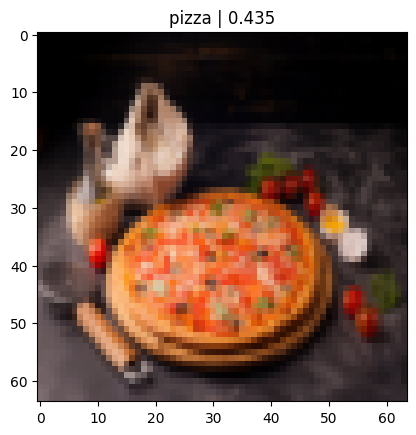

In [ ]:
pred_and_plot_image(model02,
                    transform_pipeline,
                    'thumb.jpg',
                    train_data.classes)

In [35]:
%%writefile prog.py

import argparse

parser = argparse.ArgumentParser()
parser.add_argument('echo', nargs='*', help='echo the string you use')
parser.add_argument('square', help='a square', type=int)
parser.add_argument('-v', '--verbosity', nargs='+', help='output verbosity')
args = parser.parse_args()
print(args.echo)
print(args.square**2)
if args.verbosity:
  print('turn on')

Overwriting prog.py


In [15]:
!python prog.py

usage: prog.py [-h] [--verbosity VERBOSITY] echo square
prog.py: error: the following arguments are required: echo, square


In [10]:
!python prog.py --help

usage: prog.py [-h] echo

positional arguments:
  echo        echo the string you use

options:
  -h, --help  show this help message and exit


In [36]:
!python prog.py foo 4

['foo']
16
